In [3]:
!unzip -q test.zip -d /content/test

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
model = load_model("mobilenetv2_strawberry_ripeness_final.h5")

In [5]:
image_size = (224, 224)
img_folder = "/content/test/test"
img_names = sorted(os.listdir(img_folder))

X_test = []
for img_name in img_names:
    img_path = os.path.join(img_folder, img_name)
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    X_test.append(img_array)

X_test = np.array(X_test)

In [6]:
class_indices = {'ripe': 0, 'turning': 1, 'unripe': 2}
idx_to_class = {v: k for k, v in class_indices.items()}
class_labels = ['ripe', 'turning', 'unripe']

In [11]:
pred_probs = model.predict(X_test)
pred_indices = np.argmax(pred_probs, axis=1)
class_indices = {'ripe': 0, 'turning': 1, 'unripe': 2}
idx_to_class = {v: k for k, v in class_indices.items()}
predicted_labels = [idx_to_class[i] for i in pred_indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


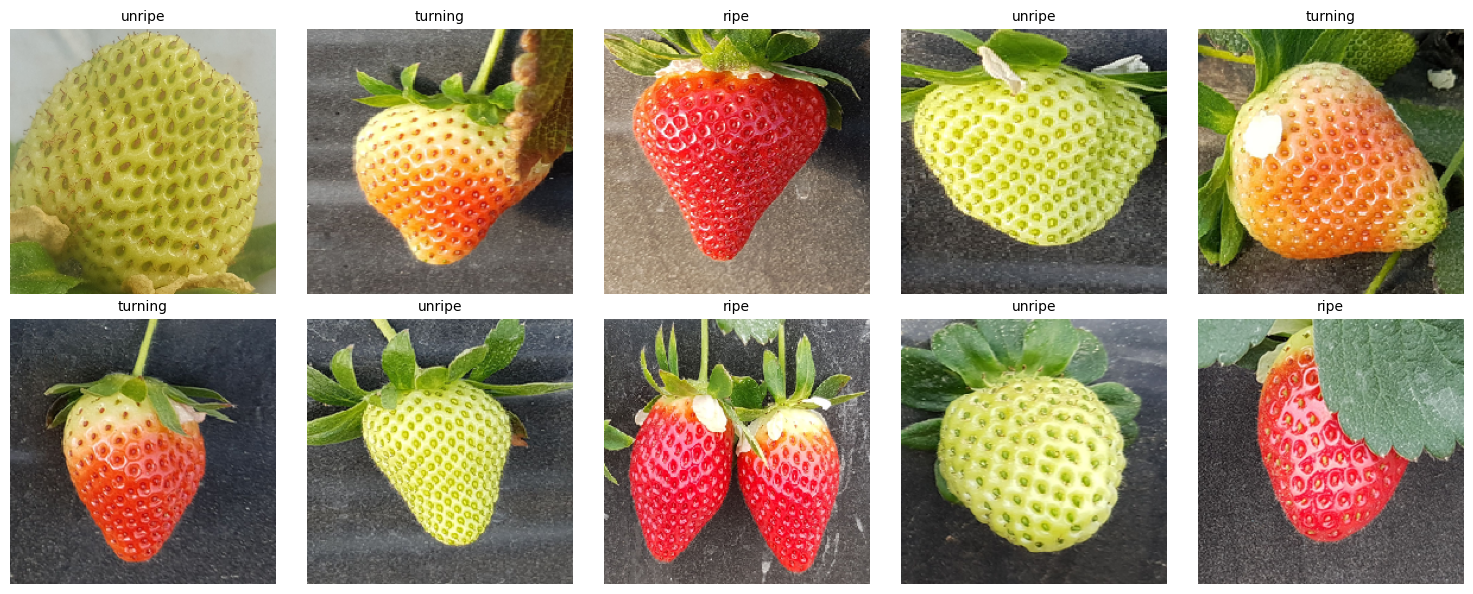

In [20]:
cols = 5
rows = int(np.ceil(len(X_test) / cols))
plt.figure(figsize=(15, 3 * rows))

for i, (img_array, label) in enumerate(zip(X_test, predicted_labels)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_array)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
true_labels = ['unripe', 'turning', 'ripe', 'unripe', 'turning', 'turning', 'unripe', 'ripe', 'unripe', 'ripe']
true_indices = [class_indices[label] for label in true_labels]

In [17]:
cm = confusion_matrix(true_indices, pred_indices)
report = classification_report(true_indices, pred_indices, target_names=class_labels, digits=4)

In [18]:
with open("/content/day13_metrics_report.txt", "w") as f:
    f.write("Confusion Matrix:\n")
    for row in cm:
        f.write(' '.join(map(str, row)) + "\n")
    f.write("\nClassification Report:\n")
    f.write(report)